In [92]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset

#Loading training data
dataset = pd.read_csv("bmi_train.csv")
dataset.replace({'Gender': {'Female': 0, 'Male': 1}}, inplace=True) #Gender -> boolean
dataset = dataset.to_numpy()

#Splitting off 80% of data for training, 20% for validation
train_split = int(0.8 * len(dataset))
X_train = dataset[:train_split, [0,1,2]]
y_train = dataset[:train_split, 3]
X_test = dataset[train_split:, [0,1,2]]
y_test = dataset[train_split:, 3]

#Loading prediction data
prediction_dataset = pd.read_csv("bmi_validation.csv")
prediction_dataset.replace({'Gender': {'Female': 0, 'Male': 1}}, inplace=True) #Gender -> boolean
X_prediction = prediction_dataset.to_numpy()

#normalize data set
X_train_normalized = (X_train - X_train.min(0)) / (X_train.max(0) - X_train.min(0))
X_test_normalized = (X_test - X_test.min(0)) / (X_test.max(0) - X_test.min(0))
X_prediction_normalized = (X_prediction - X_prediction.min(0)) / (X_prediction.max(0) - X_prediction.min(0))

#turn data to tensor
X_train_tensor = torch.from_numpy(X_train_normalized)
y_train_tensor = torch.from_numpy(y_train)
X_test_tensor = torch.from_numpy(X_test_normalized)
y_test_tensor = torch.from_numpy(y_test)
X_prediction_tensor = torch.from_numpy(X_prediction_normalized)


In [93]:
torch.manual_seed(42)

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.zeros(3, 1, #tensor size (3,1) for 3 variables and 1 output
                                               dtype=torch.float),
                                  requires_grad=True) #we can update this value with gradient descent
        self.bias = nn.Parameter(torch.zeros(1,
                                            dtype=torch.float),
                                requires_grad=True)
    #define one computation step as forward
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return torch.transpose(self.weights, 0, 1) * x + self.bias #regression formula

In [94]:
#Create instance of model
model_0 = LinearRegressionModel()

#Check nn.Parameters in the nn.Module subclass created
list(model_0.parameters())

[Parameter containing:
 tensor([[0.],
         [0.],
         [0.]], requires_grad=True),
 Parameter containing:
 tensor([0.], requires_grad=True)]

In [95]:
#Create loss function (Mean absolute error)
loss_fn = nn.MSELoss()

#Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), #parameters of target model to optimize
                           lr=0.01) #learning rate, how much optimizer should change the parameters each step



In [96]:
#ACTUAL TRAINING OF THE MODEL

torch.manual_seed(42)
#no. of times the model will pass over the training data
epochs = 1000

#Create empty loss list to track loss values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ###TRAINING!!!
    
    #Put model in training mode
    model_0.train()
    
    # 1. Forward pass on train data
    y_pred = model_0(X_train_tensor) #weight prediction
    #calculated index prediction
    index_pred = torch.sum(torch.mul(X_train_tensor, y_pred), dim=1) + model_0.bias #sum product of weight and data
        
    # 2. Calculate loss from prediction
    loss = loss_fn(index_pred.double(), y_train_tensor.double())
    
    # 3. Zero grad of optimizer
    optimizer.zero_grad()
    
    # 4. Loss backwards
    loss.backward()
    
    # 5. Progress the optimizer
    optimizer.step()
    
    ###TESTING ACCURACY!!!
    
    #Put model in evaluation mode
    model_0.eval()
    
    with torch.inference_mode():
        # 1. Forward pass on test data
        test_pred = model_0(X_test_tensor)
        
        # 2. Calculate loss on test data
        test_sum_prod = torch.sum(torch.mul(X_test_tensor, test_pred), dim=1) + model_0.bias
        test_loss = loss_fn(test_sum_prod, y_test_tensor)
        
        #Print out what is happening (each 10 steps)
        if epoch % 1 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
    
    

Epoch: 0 | MAE Train Loss: 15.80625 | MAE Test Loss: 12.244346394535613 
Epoch: 1 | MAE Train Loss: 12.097977166527667 | MAE Test Loss: 9.519757819975723 
Epoch: 2 | MAE Train Loss: 9.406777537929964 | MAE Test Loss: 7.5351409392734325 
Epoch: 3 | MAE Train Loss: 7.453224524927168 | MAE Test Loss: 6.088252695956648 
Epoch: 4 | MAE Train Loss: 6.034662509015179 | MAE Test Loss: 5.0322527097664445 
Epoch: 5 | MAE Train Loss: 5.0041140945370195 | MAE Test Loss: 4.2605070524628905 
Epoch: 6 | MAE Train Loss: 4.254983164151073 | MAE Test Loss: 3.695562027486068 
Epoch: 7 | MAE Train Loss: 3.7099594883252918 | MAE Test Loss: 3.2811466322701177 
Epoch: 8 | MAE Train Loss: 3.312974216251581 | MAE Test Loss: 2.976366017623884 
Epoch: 9 | MAE Train Loss: 3.0233621345906996 | MAE Test Loss: 2.7514914684639757 
Epoch: 10 | MAE Train Loss: 2.8116312264876924 | MAE Test Loss: 2.5849020034068486 
Epoch: 11 | MAE Train Loss: 2.656391563427617 | MAE Test Loss: 2.4608667622588927 
Epoch: 12 | MAE Train 

Epoch: 734 | MAE Train Loss: 0.7593775183531679 | MAE Test Loss: 0.6795372816219828 
Epoch: 735 | MAE Train Loss: 0.7588212795741079 | MAE Test Loss: 0.6791005641896687 
Epoch: 736 | MAE Train Loss: 0.7582664028355509 | MAE Test Loss: 0.6786651319921908 
Epoch: 737 | MAE Train Loss: 0.7577128950531813 | MAE Test Loss: 0.6782309888351286 
Epoch: 738 | MAE Train Loss: 0.757160808113205 | MAE Test Loss: 0.6777981065817589 
Epoch: 739 | MAE Train Loss: 0.7566100736980484 | MAE Test Loss: 0.6773665495361925 
Epoch: 740 | MAE Train Loss: 0.7560606936853306 | MAE Test Loss: 0.6769362700738979 
Epoch: 741 | MAE Train Loss: 0.7555127248224774 | MAE Test Loss: 0.6765072403962951 
Epoch: 742 | MAE Train Loss: 0.7549660990297195 | MAE Test Loss: 0.6760795249736211 
Epoch: 743 | MAE Train Loss: 0.7544208181656245 | MAE Test Loss: 0.6756530006595062 
Epoch: 744 | MAE Train Loss: 0.7538768791755542 | MAE Test Loss: 0.6752278250296966 
Epoch: 745 | MAE Train Loss: 0.7533343186715478 | MAE Test Loss: 0

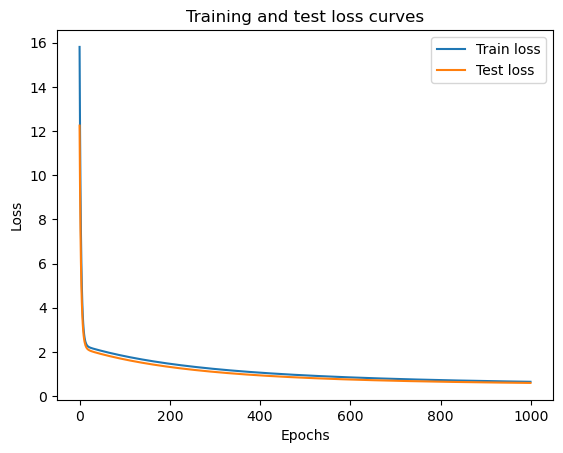

In [97]:
#Plot the loss curves
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [98]:
#Find model's learnt parameters
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([[-1.5060],
        [-2.5791],
        [ 1.6318]])), ('bias', tensor([1.8871]))])
